<a href="https://colab.research.google.com/github/rainbowcity05/tibame0410/blob/main/tibame0417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#檔案讀寫
f = open("a.txt", "w", encoding="utf-8")
# 以前: write(f, "abcde")
# 專屬(型態)功能: f.write("abcde")
# 特殊字元(換行/TAB\backspace)
# \(跳脫字元)字母
# \n: 換行 \t: TAB
f.write("abcde\n")
f.write("12345\n")
# 以前: close(f)
# 專屬: f.close()
f.close()

In [ ]:
#專屬功能
f = open("a.txt", "r", encoding="utf-8")
# 以前: content = read(f)
# 現在: content = f.read()
content = f.read()
print(content)
f.close()

In [ ]:
#抓巴哈姆特動畫風的影片彈幕
import urllib.request as req
url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
print(content)
# content是bytes型態, 但要把它轉換成list/dict型態, 使用json編碼器與解碼器
# jason.loads 後面的s代表字串
import json
content_convert = json.loads(content) #將型態轉為字典
data = content_convert["data"]
danmu_list = data["danmu"]
for danmu in danmu_list:
  userid = danmu["userid"]
  text = danmu["text"]
  print(userid,text)


標準表格格式:CSV TSV
(comma-separtated value)(tab)
姓名,身高
Rainbow, 145
"Rainbow,Mr.Wu",145

In [36]:
#抓巴哈姆特動畫風的影片彈幕存成tsv檔
import urllib.request as req
url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()

# content是bytes型態, 但要把它轉換成list/dict型態, 使用json編碼器與解碼器
# jason.loads 後面的s代表字串
import json
content_convert = json.loads(content) #將型態轉為字典
f = open("danmu.tsv","w",encoding = "utf-8")
f.write("ID\tTEXT\n")

data = content_convert["data"]
danmu_list = data["danmu"]
for danmu in danmu_list:
  userid = danmu["userid"]
  text = danmu["text"]
  line = '"' + userid + '"\t"' + text + '"\n'
  f.write(line)
f.close()


pandas: 表格處理

In [ ]:
!pip install pandas #灌函式庫

In [39]:
#用pandas處理

import urllib.request as req
import json
import pandas as pd
url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
content_convert = json.loads(content)

f = open("danmu.tsv","w",encoding = "utf-8")
f.write("ID\tTEXT\n")

data = content_convert["data"]
danmu_list = data["danmu"]
#型態轉換:list > pandas自訂義的表格型態(DataFrame)
table = pd.json_normalize(danmu_list)
#專屬功能: to_xxx 將panda表格轉成xxx的格式
#如果不需要列標籤，就多帶index=False
table.to_csv("吉伊卡哇.tsv",sep="\t",encoding="utf-8")


In [51]:
import pandas as pd
df = pd.read_csv("吉伊卡哇.tsv",sep="\t",encoding="utf-8") #原始表格
#取行操作
df["text"]
#多行取行:把要抓的行放在一個list裡
cols = ["userid","text"]
df2 = df[cols]
df2

,userid,text
0,s970446,謝謝巴哈大哥
1,wex690825,第一次
2,z80262001,0.0
3,ouyang318,耶
4,qaz1210731,二刷
...,...,...
482,g840483938,泡泡驗超市和看
483,ZED8090,ZMB
484,kekerry75,😀
485,linzzi,沒了？？？？


In [ ]:
#針對userid做統計
df["userid"].value_counts() #先取行，然後算總共出現幾次


In [52]:
#pandas必會1.篩選
#df[帶入跟你資料筆數一樣多的true/false]
#demo
fil = [True, False, True, False, True]

WIN: -headers "Origin: https://ani.gamer.com.tw" -i "" anime.mp4

MAC: -headers 'Origin: https://ani.gamer.com.tw' -i '' anime.mp4

ffmpeg(用拉的) 複製並且把-i後面的""填入m3u8

In [ ]:
scores = [20,30,10]
print(max(scores),min(scores),sum(scores))
print(len(scores))
#座號(key):0 1 2
#scores[len(scores)-1]
#反向座號(key):-3 -2 -1
print(scores[-1])

#取段:list[起始key:結束key(不包含)]
scores = [9,8,7,6,5,4,3,2,1]
print(scores[2:5])
print(scores[2:-1])

#取段跳號: list[起始key:結束key(不包含):幾個一跳]
print(scores[2:8:2])

#如果沒寫跳號:其實跳號=1
#反向跳號: 幾個一跳是minus, 反向跳號要從右邊到左邊
print(scores[8:2:-2])

#省略
print(scores[:8])
print(scores[2:])
print(scores[::2])
print(scores[2:])

#反過來
print(scores[::-1])


30 10 60
3
10
[7, 6, 5]
[7, 6, 5, 4, 3, 2]
[7, 5, 3]
[1, 3, 5]
[9, 8, 7, 6, 5, 4, 3, 2]
[7, 6, 5, 4, 3, 2, 1]
[9, 7, 5, 3, 1]
[7, 6, 5, 4, 3, 2, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


(647, 1152, 3)


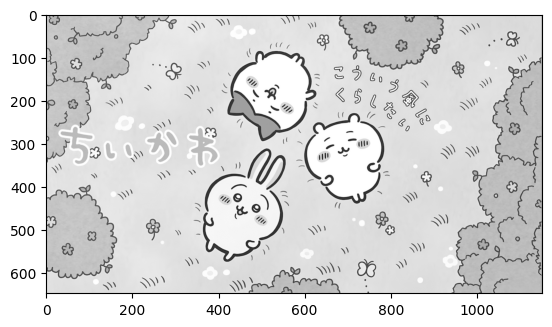

In [23]:
#開啟網頁
import urllib.request as req

# 多維矩陣函式庫: numpy 使用「陣列」代替 Python 原生的「串列」( 列表 ) 來處理資料，圖形需轉成數據才能處理
import numpy as np

# 繪圖函式庫: matplotlib
import matplotlib.pyplot as plt

# Python兩大圖片函式庫: Pillow/OpenCV 讀取、處理、修改和儲存圖片
from PIL import Image

url = "https://github.com/Elwing-Chou/tibame0410/raw/refs/heads/main/chiikawa.webp"
req.urlretrieve(url, "chiikawa.webp")

img = Image.open("chiikawa.webp")
img_np = np.array(img)

# np array的一個很重要操作就是取段
# array[第一個維度, 第二個維度, 第三個維度]
# 每一個維度都是取段操作
print(img_np.shape)

# 長取三百 寬取500, rgb不便
img_np_test = img_np[:300, :500, :]
# rgb -> bgr
img_np_test = img_np[:, :, ::-1]
# 左右相反
img_np_test = img_np[:, ::-1, :]
# 上下相反
img_np_test = img_np[::-1, :, :]
# 縮小一半
img_np_test = img_np[::2, ::2, :]
# 取r
img_np_test = img_np[:, :, 0]
# 如果轉成灰階(轉成0-1的小樹)
# L = R * 299/1000 + G * 587/1000 + B * 114/1000
img_np_norm = img_np / 255.0
r, g, b = img_np_norm[:, :, 0], img_np_norm[:, :, 1], img_np_norm[:, :, 2]
img_np_gray = 0.299 * r + 0.587 * g + 0.114 * b
# h, w, _ = img_np.shape
# img_np_partial = img_np[h//4:3*h//4, w//4:3*w//4, :]
# plt.imshow(img_np_test)
plt.imshow(img_np_gray, cmap="gray")

In [7]:
scores = [80,60,30,50]
#檢查有幾個大於60
i = 0
count = 0
while i < len(scores):
  s = scores[i]
  if s < 60:
    print(s)
    count = count + 1
  i = i + 1

print(count)
#此算法有個缺陷，因為此語法用list所以有順序0,1,2...，但有些資料沒有順序，就無法使用這語法

30
50
2


In [12]:
#for(代號)in(str/list): 走過..(str/list)

scores = [80,60,30,50]
count = 0
for s in scores:
  if s < 60:
    print(s)
    count = count + 1
print(count)

30
50
2


In [ ]:
#算1-10的加總
total = 0

for i in range(10):
  total = total + (i + 1)
  print(i,total)





迴圈SOP:
1.走過一群:for 名稱 in 群
2.固定次數:for i in range
3.其他條件:while True + break


In [27]:
#字典: key(字串/數字):value
student = {
    "姓名":"Rainbow",
    "weight":45,
    "high":175
}
#查詢
print(student["姓名"])

#新增
student["scores"]="A+"
print(student)

#修改原有的value，拿出來加上去再放回去
student["weight"] = student["weight"]+5
print(student["weight"])



Rainbow
{'姓名': 'Rainbow', 'weight': 45, 'high': 175, 'scores': 'A+'}
50
